# Introduction
In this work, we are looking for patterns based on data from several exchanges about price and volume changes. We suppose to find patterns that show the same price change after their appearance. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

os.chdir('../..')

In [2]:
data_2020_01 = pd.read_csv('data/SPY_historical_data/SPY_2020/SPY_2020-01.txt',
                        header=None,
                        names=['datetime', 'price', 'volume', 'stock_exchange'])

Let's limit the trading time from '9:30' to '16:00 'and how it will become known later that the calculations for the whole month will take too long, so we will take the data for only one day on January 2, 2020.

In [3]:
data_2020_01.datetime = pd.to_datetime(data_2020_01.datetime, format='%Y-%m-%d %H:%M:%S:%f')
data_2020_01['date_day'] = data_2020_01['datetime'].apply(lambda x: x.day)
data_2020_01 = data_2020_01[data_2020_01.date_day == data_2020_01.date_day.min()].set_index('datetime').between_time('9:30', '16:00')
data_2020_01

,price,volume,stock_exchange,date_day
datetime,,,,
2020-01-02 09:30:00.002,323.54,500,XNGS,2
2020-01-02 09:30:00.002,323.54,300,BATS,2
2020-01-02 09:30:00.002,323.56,3000,ARCX,2
2020-01-02 09:30:00.002,323.56,600,ARCX,2
2020-01-02 09:30:00.002,323.54,1,BATS,2
...,...,...,...,...
2020-01-02 15:59:59.992,324.84,2000,BATS,2
2020-01-02 15:59:59.992,324.84,200,BATS,2
2020-01-02 15:59:59.992,324.84,200,BATS,2


Let's round the prices down to cents due to the fact that later in the course of calculations the prices will round up and patterns with the same prices in a row will appear, which we want to avoid. Further, we will define and remove the same prices that follow each other.

In [4]:
data_2020_01['diff'] = data_2020_01['price'].diff(periods=1)
data_2020_01 = data_2020_01[data_2020_01['diff'] != 0].drop(columns=['diff'])
data_2020_01

,price,volume,stock_exchange,date_day
datetime,,,,
2020-01-02 09:30:00.002,323.54,500,XNGS,2
2020-01-02 09:30:00.002,323.56,3000,ARCX,2
2020-01-02 09:30:00.002,323.54,1,BATS,2
2020-01-02 09:30:00.002,323.56,796,ARCX,2
2020-01-02 09:30:00.002,323.54,100,EDGX,2
...,...,...,...,...
2020-01-02 15:59:59.939,324.84,200,FINR,2
2020-01-02 15:59:59.939,324.85,600,FINR,2
2020-01-02 15:59:59.965,324.84,100,BATS,2


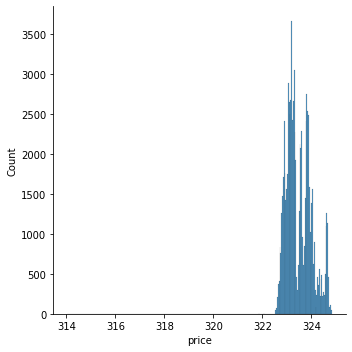

In [5]:
# Prices distribution
sns.displot(data=data_2020_01, x='price');

The data is prepared for patterns detection with help of script "research\src\SPY_patterns_scanner\main.py".